# Loan Approval

IMPORTING LIBRARIES

In [1]:
import matplotlib.pyplot as plt             # to visualize
from tabulate import tabulate               # to print the table
import matplotlib as mat                    # to visualize 
import seaborn as sns                       # to visualize
import pandas as pd                         # for data reading
import numpy as np                          # for numerical computation

READING THE FILE

In [2]:
df=pd.read_csv('data (2).csv')
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,-232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,-182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,-4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,-340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2


NO.OF ROWS AND COLUMNS

In [3]:
df.shape

(100000, 24)

COLUMNS NAME

In [4]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'GENDER', 'Car', 'House',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'DAYS_EMPLOYED', 'MOBILE', 'WORK_PHONE',
       'HOME_PHONE', 'MOBILE_REACHABLE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'APPLICATION_DAY', 'TOTAL_DOC_SUBMITTED'],
      dtype='object')

DATASET INFORMATION

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           100000 non-null  int64  
 1   TARGET               100000 non-null  int64  
 2   NAME_CONTRACT_TYPE   100000 non-null  object 
 3   GENDER               100000 non-null  object 
 4   Car                  100000 non-null  object 
 5   House                100000 non-null  object 
 6   CNT_CHILDREN         100000 non-null  int64  
 7   AMT_INCOME_TOTAL     100000 non-null  float64
 8   AMT_CREDIT           100000 non-null  float64
 9   AMT_GOODS_PRICE      99919 non-null   float64
 10  NAME_TYPE_SUITE      99595 non-null   object 
 11  NAME_INCOME_TYPE     100000 non-null  object 
 12  NAME_EDUCATION_TYPE  100000 non-null  object 
 13  NAME_FAMILY_STATUS   100000 non-null  object 
 14  DAYS_EMPLOYED        100000 non-null  int64  
 15  MOBILE            

CHECKING FOR NULL VALUES

In [6]:
df.isnull().sum()

SK_ID_CURR                 0
TARGET                     0
NAME_CONTRACT_TYPE         0
GENDER                     0
Car                        0
House                      0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_GOODS_PRICE           81
NAME_TYPE_SUITE          405
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
DAYS_EMPLOYED              0
MOBILE                     0
WORK_PHONE                 0
HOME_PHONE                 0
MOBILE_REACHABLE           0
FLAG_EMAIL                 0
OCCUPATION_TYPE        31224
CNT_FAM_MEMBERS            1
APPLICATION_DAY            0
TOTAL_DOC_SUBMITTED        0
dtype: int64

SEPARATING CATEGORICAL AND CONTINUOUS VARIABLES

In [7]:
def separate_data_types(df):
    categorical = []
    continuous = []
    for column in df.columns:                # looping on the number of columns
        if df[column].nunique() < 20:       # nunique:  returns unique values in the column,
                                                    #here 10 is the hyperparamter and can be changed
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = separate_data_types(df)         # Calling the function

# # Tabulate is a package used to print the list, dict or any data sets in a proper format; in table format
from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "Continuous": continuous}, headers = ["categorical", "continuous"]))

categorical          continuous
-------------------  ----------------
TARGET               SK_ID_CURR
NAME_CONTRACT_TYPE   AMT_INCOME_TOTAL
GENDER               AMT_CREDIT
Car                  AMT_GOODS_PRICE
House                DAYS_EMPLOYED
CNT_CHILDREN
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
MOBILE
WORK_PHONE
HOME_PHONE
MOBILE_REACHABLE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
APPLICATION_DAY
TOTAL_DOC_SUBMITTED


RECORRECTING THE VARIABLES SEPARATION

In [8]:
categorical.remove('CNT_FAM_MEMBERS')
continuous.append('CNT_FAM_MEMBERS')
categorical.remove('TOTAL_DOC_SUBMITTED')
continuous.append('TOTAL_DOC_SUBMITTED')
categorical.remove('CNT_CHILDREN')
continuous.append('CNT_CHILDREN')

In [9]:
continuous

['SK_ID_CURR',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'DAYS_EMPLOYED',
 'CNT_FAM_MEMBERS',
 'TOTAL_DOC_SUBMITTED',
 'CNT_CHILDREN']

USER DEFINED FUNCTIONS:-

FOR CATEGORICAL

In [10]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {df[col].unique()}") 
    print(f"Mode of {col} is {df[col].mode()[0]}") 

FOR CONTINUOUS

In [11]:
def info_of_num(col):
    print(f"The mean of the {col} is {df[col].mean()}")
    print(f"The median of the {col} is {df[col].median()}")
    print(f"The mode of the {col} is {df[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {df[col].std()}")

MISSING VALUE TREATMENT

In [12]:
info_of_num('AMT_GOODS_PRICE')

The mean of the AMT_GOODS_PRICE is 538345.1489706662
The median of the AMT_GOODS_PRICE is 450000.0
The mode of the AMT_GOODS_PRICE is 450000.0
The standard deviation of the AMT_GOODS_PRICE is 369397.7246421765


In [13]:
bt_mean = df['AMT_GOODS_PRICE'].mean()
df["AMT_GOODS_PRICE"].fillna(bt_mean, inplace = True, axis = 0)

In [14]:
info_of_cat('NAME_TYPE_SUITE')

Unique values in NAME_TYPE_SUITE are: ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
Mode of NAME_TYPE_SUITE is Unaccompanied


In [15]:
bt_mode = df['NAME_TYPE_SUITE'].mode()[0]
df["NAME_TYPE_SUITE"].fillna(bt_mode, inplace = True, axis = 0)

In [16]:
info_of_cat('OCCUPATION_TYPE')

Unique values in OCCUPATION_TYPE are: ['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty agents' 'Secretaries'
 'IT staff' 'HR staff']
Mode of OCCUPATION_TYPE is Laborers


In [17]:
bt_mode = df['OCCUPATION_TYPE'].mode()[0]
df["OCCUPATION_TYPE"].fillna(bt_mode, inplace = True, axis = 0)

In [18]:
info_of_num('CNT_FAM_MEMBERS')

The mean of the CNT_FAM_MEMBERS is 2.1556715567155673
The median of the CNT_FAM_MEMBERS is 2.0
The mode of the CNT_FAM_MEMBERS is 2.0
The standard deviation of the CNT_FAM_MEMBERS is 0.9088966556371371


In [19]:
bt_mean = df['CNT_FAM_MEMBERS'].mean()
df["CNT_FAM_MEMBERS"].fillna(bt_mean, inplace = True, axis = 0)

CHECKING AGAIN FOR NULL VALUES

In [20]:
df.isnull().sum()

SK_ID_CURR             0
TARGET                 0
NAME_CONTRACT_TYPE     0
GENDER                 0
Car                    0
House                  0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
AMT_CREDIT             0
AMT_GOODS_PRICE        0
NAME_TYPE_SUITE        0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
DAYS_EMPLOYED          0
MOBILE                 0
WORK_PHONE             0
HOME_PHONE             0
MOBILE_REACHABLE       0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
APPLICATION_DAY        0
TOTAL_DOC_SUBMITTED    0
dtype: int64

REMOVING OUTLIERS FROM CONTINUOUS VARIABLES

In [21]:
print('ROWS AND COLUMNS BEFORE REMOVING OUTLIERS:',df.shape)
print()
def myoutliers(df,col):
    
    Q1=np.quantile(df[col],0.25)
    Q3=np.quantile(df[col],0.75)
    
    IQR=Q3-Q1
    
    global mylist
    global my_outlier_df
    
    UF=Q3+1.5*IQR
    LF=Q1-1.5*IQR
    
    print('LOWER RANGE OF',col,'IS',LF)
    print('UPPER RANGE OF',col,'IS',UF)
    
    mylist=[x for x in df[col] if((x<LF) | (x>UF))]
    print('TOTAL OUTLIERS IN',col,'ARE',len(mylist))
    my_outlier_df=df.loc[df[col].isin(mylist)]
    
k=['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE']

for i in k:
    print('I is', i)
    myoutliers(df, i)
    Index=my_outlier_df.index
    df=df.drop(Index)
    print("************************************")
print()
print('ROWS AND COLUMNS AFTER REMOVING OUTLIERS:',df.shape,'\n')

ROWS AND COLUMNS BEFORE REMOVING OUTLIERS: (100000, 24)

I is AMT_INCOME_TOTAL
LOWER RANGE OF AMT_INCOME_TOTAL IS -22500.0
UPPER RANGE OF AMT_INCOME_TOTAL IS 337500.0
TOTAL OUTLIERS IN AMT_INCOME_TOTAL ARE 4571
************************************
I is AMT_CREDIT
LOWER RANGE OF AMT_CREDIT IS -513000.0
UPPER RANGE OF AMT_CREDIT IS 1575000.0
TOTAL OUTLIERS IN AMT_CREDIT ARE 1646
************************************
I is AMT_GOODS_PRICE
LOWER RANGE OF AMT_GOODS_PRICE IS -438750.0
UPPER RANGE OF AMT_GOODS_PRICE IS 1343250.0
TOTAL OUTLIERS IN AMT_GOODS_PRICE ARE 2201
************************************

ROWS AND COLUMNS AFTER REMOVING OUTLIERS: (91582, 24) 



FOR CALCULATING PERCENTAGE IN COUNT PLOTS:-

In [22]:
def bar_percentage(ax, count: "number of rows in data "):
    L=[]
    for bar in ax.patches:                                            
        percentage = f"{round((bar.get_height() / count) *100, 2)}%"  
                                                                            
        x = bar.get_x() + bar.get_width() /2                   
        y = bar.get_height()                                          
        ax.annotate(percentage, (x, y), va = "bottom", ha = "center")  
        #print(y)
        L.append(y)         
    S=np.array(L)
    n=int(len(S)/2)
    R=np.reshape(S,(2,n)).T
    [H,I]=np.hsplit(R,2)                                    
    plt.show()
    print('RATE:')
    Ans=(I/(H+I)*100).T
    print(Ans)
    
    
def bar_percent(ax, count: "number of rows in data "):
    L=[]
    for bar in ax.patches:                                            
        percentage = f"{round((bar.get_height() / count) *100, 2)}%"  
                                                                            
        x = bar.get_x() + bar.get_width() /2                        
        y = bar.get_height()                                        
        ax.annotate(percentage, (x, y), va = "bottom", ha = "center") 
        #print(y)
        L.append(y)         
    S=np.array(L)
    n=int(len(S)/2)
    R=np.reshape(S,(2,n)).T
    [H,I]=np.hsplit(R,2)                                      
    plt.show()
    print('RATE:')
    Ans=(H/(H+I)*100).T
    print(Ans)
    
def bar_per(ax, count: "number of rows in data "):
    for bar in ax.patches:                                            
        percentage = f"{round((bar.get_height() / count) *100, 2)}%"  
                                                                            
        x = bar.get_x() + bar.get_width() /2                   
        y = bar.get_height()                                          
        ax.annotate(percentage, (x, y), va = "bottom", ha = "center")  

# $$\;\;\;\; Univariate \ Analysis \ of \ Categorical \ Variables$$

## Level 1 Analysis (Univariate Analysis)

#### CATEGORICAL DATA

In [23]:
categorical

['TARGET',
 'NAME_CONTRACT_TYPE',
 'GENDER',
 'Car',
 'House',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'MOBILE',
 'WORK_PHONE',
 'HOME_PHONE',
 'MOBILE_REACHABLE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'APPLICATION_DAY']

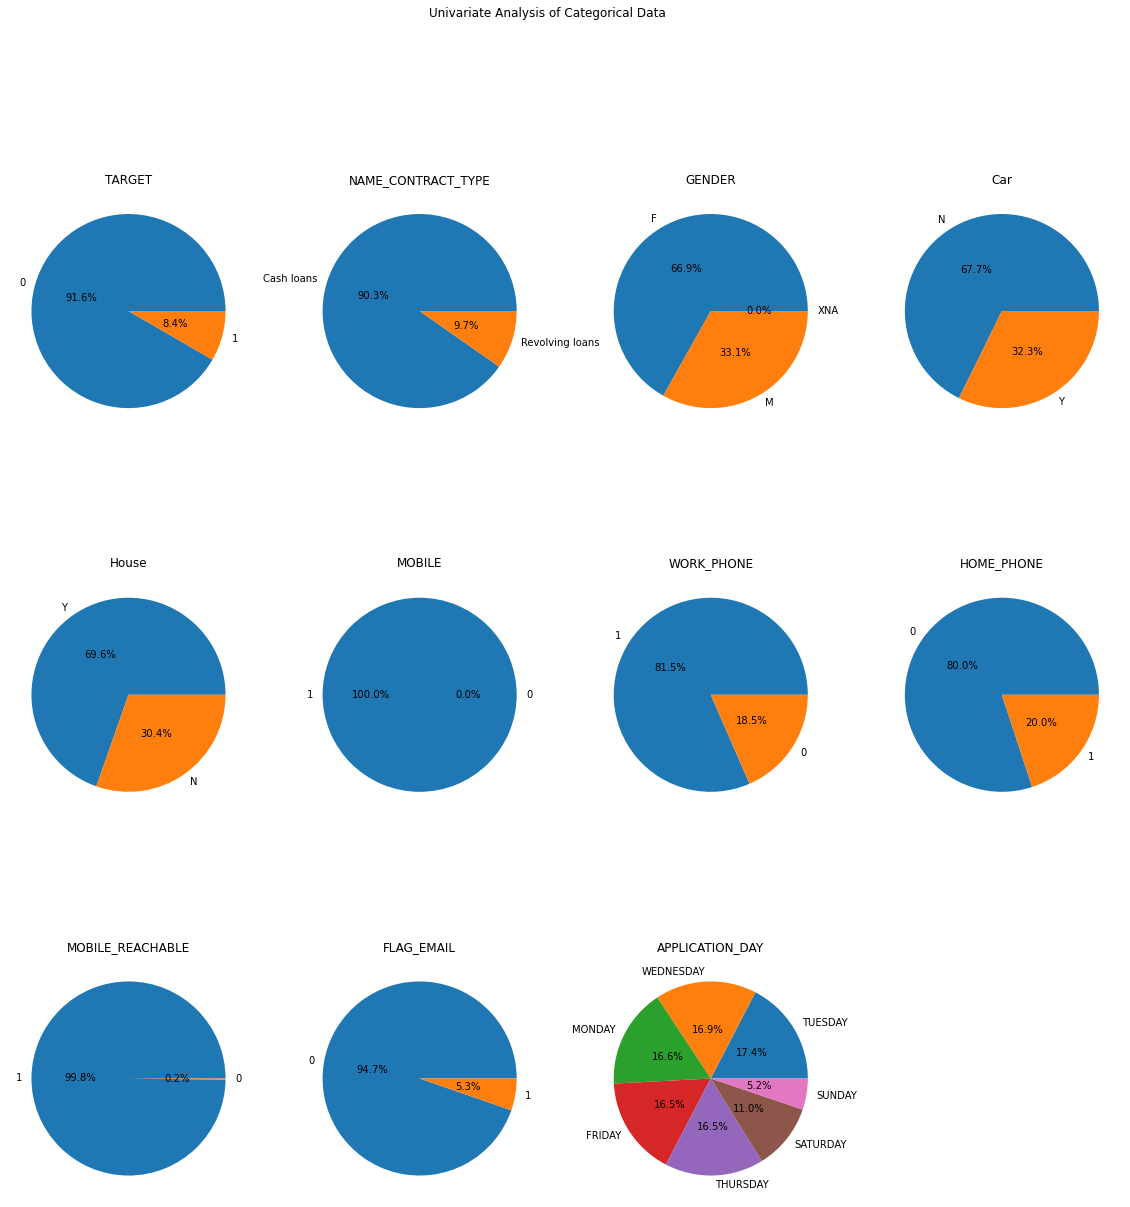

In [24]:
a=['TARGET','NAME_CONTRACT_TYPE','GENDER','Car','House','MOBILE','WORK_PHONE','HOME_PHONE','MOBILE_REACHABLE','FLAG_EMAIL','APPLICATION_DAY']
cat=list(enumerate(a))
plt.figure(figsize=(20,20))
for i in cat:
    plt.subplot(3,4,i[0]+1)                      
    d= df[i[1]].value_counts()                                                                                                    
    labels =d.keys()      
    plt.pie(x = d, autopct = "%.1f%%", labels = labels, pctdistance = 0.5)
    plt.title(i[1])
plt.suptitle('Univariate Analysis of Categorical Data')
plt.savefig('pie.jpg')
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\si

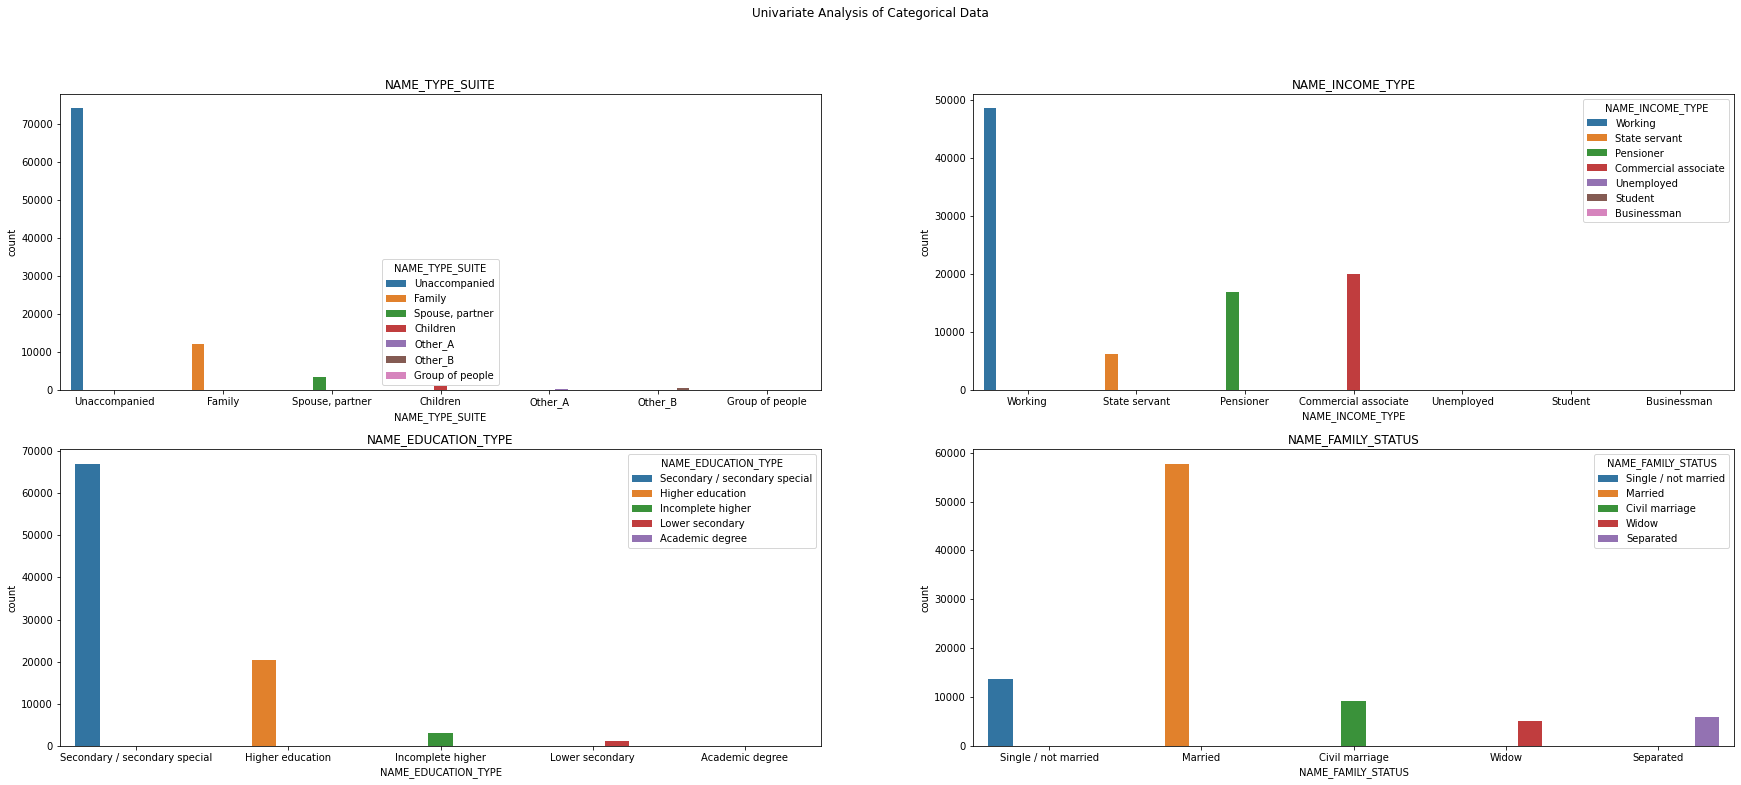

In [25]:
a=['NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS']
cat=list(enumerate(a))
plt.figure(figsize=(30,12))
for i in cat:
    plt.subplot(2,2,i[0]+1)                      
    sns.countplot(i[1],hue=i[1],data=df) 
    plt.title(i[1])
plt.suptitle('Univariate Analysis of Categorical Data')
plt.savefig('count.jpg')
plt.show()

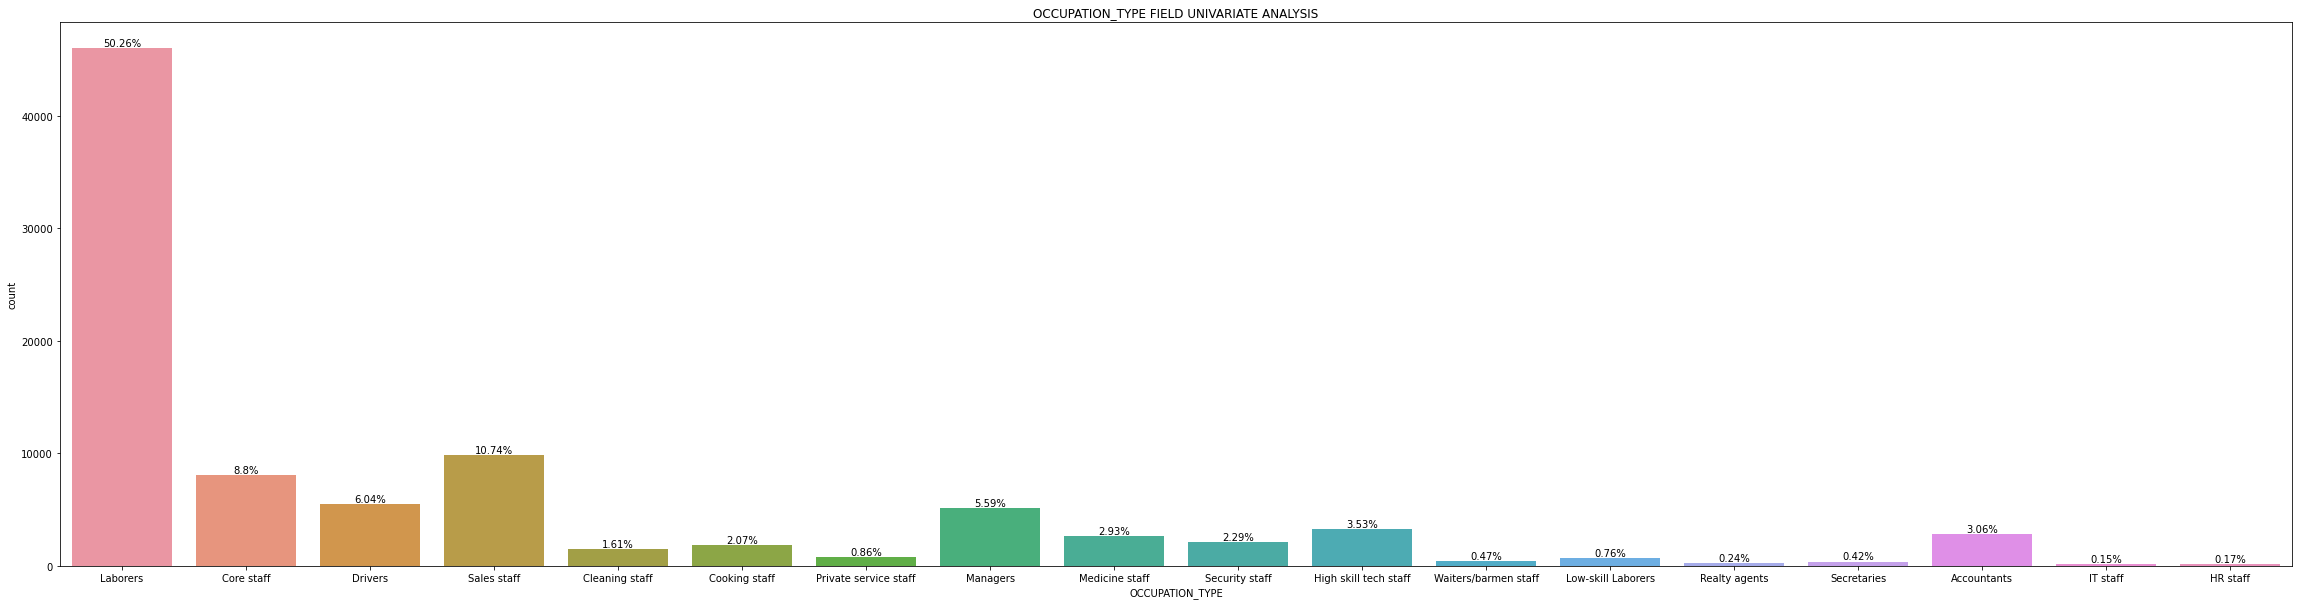

In [26]:
# OCCUPATION_TYPE FIELD UNIVARIATE ANALYSIS
fig, ax = plt.subplots(figsize = (40, 10))
sns.countplot(x = df['OCCUPATION_TYPE'], ax = ax)
bar_per(ax,len(df))
plt.title('OCCUPATION_TYPE FIELD UNIVARIATE ANALYSIS')
plt.savefig('count2.jpg')
plt.show()

### Interpretation:-

'TARGET'-Client with payment difficulties are 8.4 % and rest 91.6 % for all other cases

 'NAME_CONTRACT_TYPE'-Client who opted for cash loans are 90.3 % , while 9.7 % choose revolving loans
 
 'GENDER'-Majority are female with 66.9 % , while male is of 33.1 %
 
 'Car'-Majority of the client doesn't have car are with 67.7 % , while who have car are of 32.3 % 
 
 'House'-Majority of the client who have house are with 69.6 % , while who doesn't have house are of 30.4 %
 
 'MOBILE'-All the client provided their mobile phone
 
 'WORK_PHONE'-Majority of the client provided work phone with 81.5 % ,while 18.5 % didn't provide it
 
 'HOME_PHONE'-Majority of client with 80 % didn't provide home phone, and who have provided is of 20 % 
 
 'MOBILE_REACHABLE'-Majority of client phones are reachable with 99.8 % , while 0.2 % are not reachable
 
 'FLAG_EMAIL'-Majority of client who didn't provide email are 94.7 %, and who gave are of 5.3 %
 
 'APPLICATION_DAY'-Majority of the client applied on Tuesday with 17.4 %
 
 'NAME_TYPE_SUITE'-Majority of the client are unaccompanied
 
 'NAME_INCOME_TYPE'-Majority of the client are working
 
 'NAME_EDUCATION_TYPE'-Majority of the client are secondary/secondary special
 
 'NAME_FAMILY_STATUS'-Majority of the client are married
 
 'OCCUPATION_TYPE'-Majority of the client are laborers
 

#### CONTINUOUS DATA

In [27]:
continuous

['SK_ID_CURR',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'DAYS_EMPLOYED',
 'CNT_FAM_MEMBERS',
 'TOTAL_DOC_SUBMITTED',
 'CNT_CHILDREN']

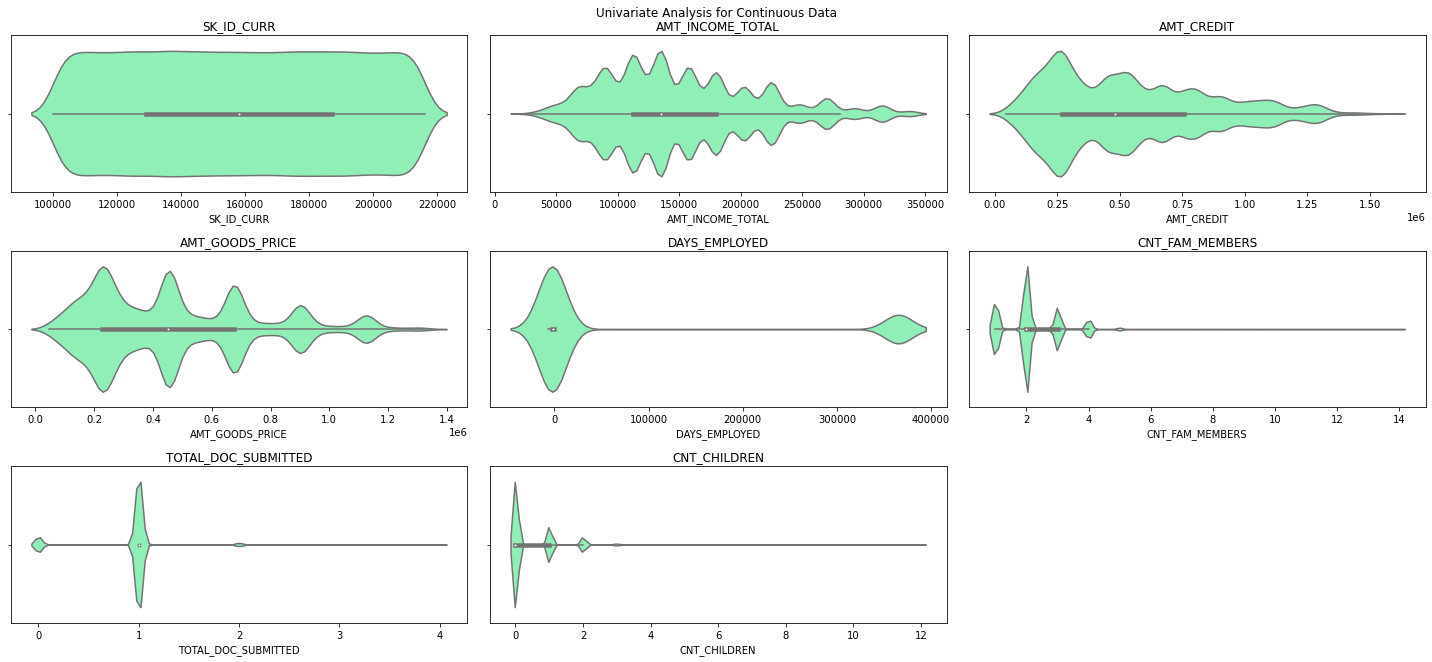

In [28]:
n=list(enumerate(continuous))
plt.figure(figsize=(20,15))
for i in n:
    plt.subplot(int(len(n)/2)+1,3,i[0]+1)
    sns.violinplot(x=i[1],data=df,palette='rainbow')
    plt.title(i[1])
plt.suptitle('Univariate Analysis for Continuous Data')
plt.tight_layout()
plt.savefig('cont.jpg')
plt.show()

### Interpretation:-

'AMT_INCOME_TOTAL'-50 % income range between 1,20,000 and 1,90,000

'AMT_CREDIT'-50 % credit amount range between 2,75,000 and 7,75,000

'AMT_GOODS_PRICE'-50 % credit amount range between 2,20,000 and 6,90,000

'CNT_FAM_MEMBERS'-50 % of the family have 2 to 3 members

'TOTAL_DOC_SUBMITTED'-Majority people have submitted 1 document

'CNT_CHILDREN'-Majority of the family have 0 to 1 children

##### TO FIND RELATIONSHIP BETWEEN THE COLUMNS

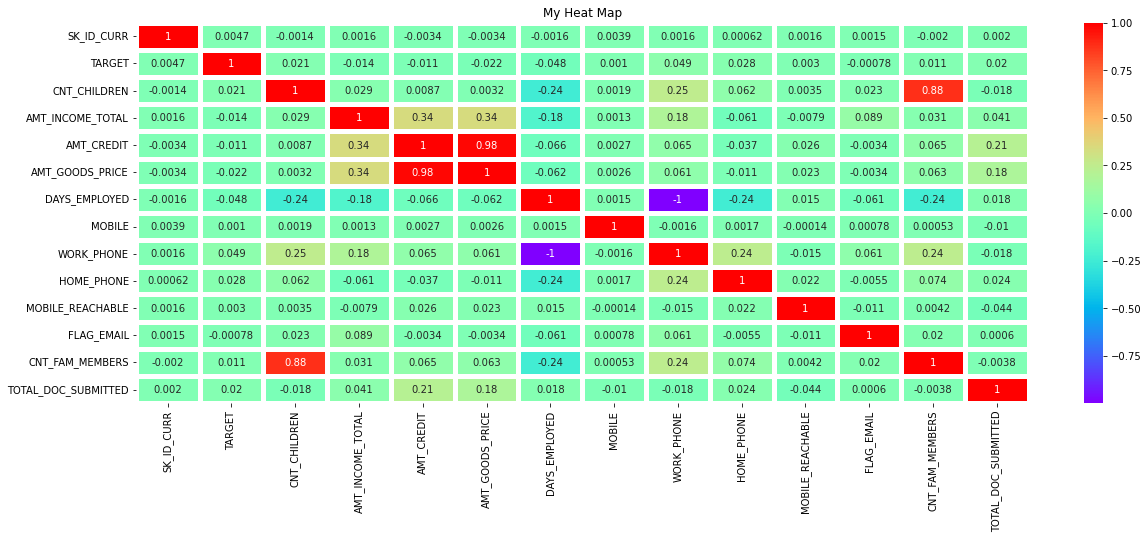

In [29]:
fig,ax=plt.subplots(figsize=(20,7))
sns.heatmap(df.corr(),cmap='rainbow',annot=True,linewidth=5).set_title('My Heat Map')
plt.savefig("Heatmap.jpg")
plt.show()


# $$\;\;\;\; Bivariate \ Analysis \ of \ Variables$$

###### Based on GENDER

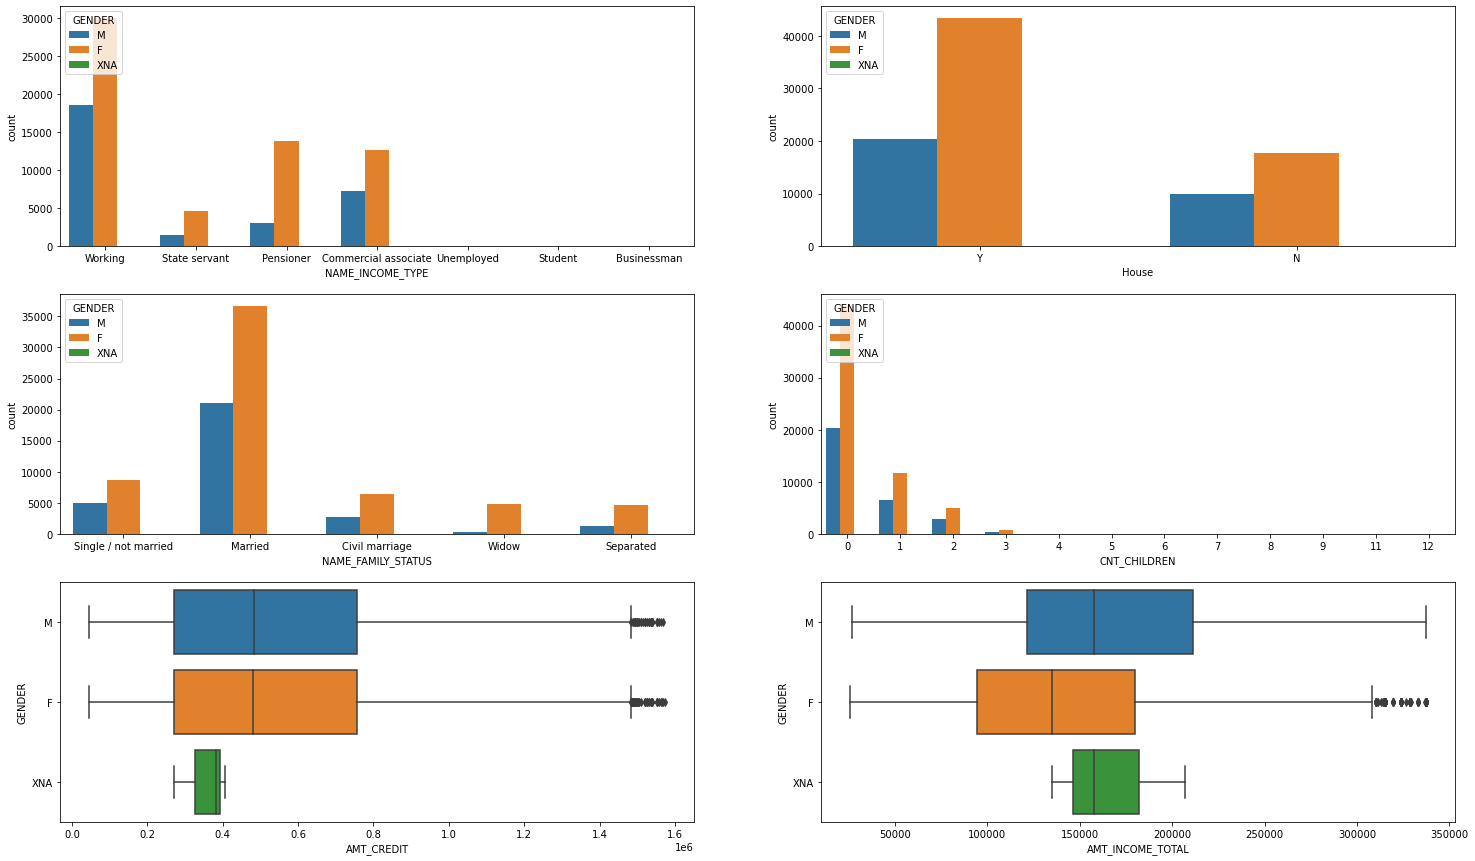

In [30]:
fig, ax = plt.subplots(3,2,figsize = (25, 15))
sns.countplot(x = "NAME_INCOME_TYPE", hue = "GENDER", data = df,ax=ax[0,0])
sns.countplot(x = "House", hue = "GENDER", data = df,ax=ax[0,1])
sns.countplot(x = "NAME_FAMILY_STATUS", hue = "GENDER", data = df,ax=ax[1,0])
sns.countplot(x = "CNT_CHILDREN", hue = "GENDER", data = df,ax=ax[1,1])
sns.boxplot(x = "AMT_CREDIT", y = "GENDER", data = df,ax=ax[2,0])
sns.boxplot(x = "AMT_INCOME_TOTAL", y = "GENDER", data = df,ax=ax[2,1])
plt.savefig("Gender.jpg")
plt.show()

Female client are leading in all income type,with houses and they are married with upto 3 children.

Both male and femlae get same AMT_CREDIT , while the AMT_INCOME_TOTAL of male is higher comparing to female

######  Based on TARGET

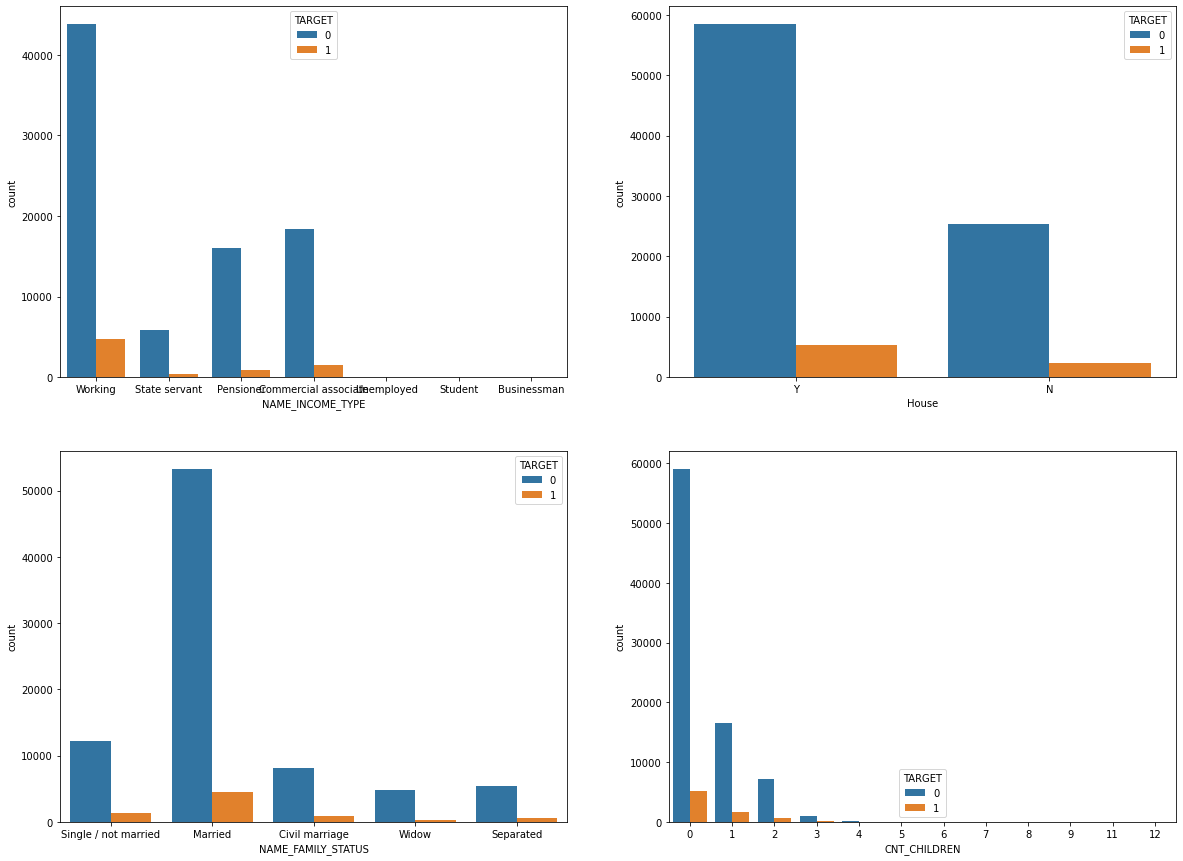

In [31]:
fig, ax = plt.subplots(2,2,figsize = (20, 15))
sns.countplot(x = "NAME_INCOME_TYPE", hue = "TARGET", data = df,ax=ax[0,0])
sns.countplot(x = "House", hue = "TARGET", data = df,ax=ax[0,1])
sns.countplot(x = "NAME_FAMILY_STATUS", hue = "TARGET", data = df,ax=ax[1,0])
sns.countplot(x = "CNT_CHILDREN", hue = "TARGET", data = df,ax=ax[1,1])
plt.savefig('target.jpg')
plt.show()

Hence Target 0 proves previous interpretation

### Problem Analysis :-

Loan is not eligible for Students and Unemployed people,whose mobile is not reachable and who have not submitted the documnets.

In [32]:
d1=df[(df.NAME_INCOME_TYPE!='Student')&(df.NAME_INCOME_TYPE!='Unemployed')&(df.MOBILE_REACHABLE!=0)&(df.TOTAL_DOC_SUBMITTED!=0)]
d1.shape

(82518, 24)

##### ADDING NEW COLUMN TO PREDICT THE LOAN POSSIBILITY

In [33]:
rate=((d1['AMT_INCOME_TOTAL'])/df['AMT_CREDIT'])*100
d1['Prediction_rate']=rate
aa=d1.pop('Prediction_rate')
d1.insert(7,"Prediction_rate",aa)
#d1

C:\Users\Admin\AppData\Local\Temp/ipykernel_4268/2232611771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1['Prediction_rate']=rate


If PREDICTION RATE IS HIGHER,THEN THE POSSIBILITY OF LOAN PAYMENT IS ALSO HIGHER

In [34]:
d1['Prediction_rate'].describe()

count    82518.000000
mean        38.180875
std         31.754258
min          3.103448
25%         19.102197
50%         29.090909
75%         45.909850
max        700.000000
Name: Prediction_rate, dtype: float64

In [35]:
d1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'GENDER', 'Car', 'House',
       'CNT_CHILDREN', 'Prediction_rate', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'DAYS_EMPLOYED', 'MOBILE',
       'WORK_PHONE', 'HOME_PHONE', 'MOBILE_REACHABLE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'APPLICATION_DAY',
       'TOTAL_DOC_SUBMITTED'],
      dtype='object')

In [36]:
#These are not defaulter(Prediction_rate value is greater than 50 %)
d3=d1[(d1.Prediction_rate>29.090909)&(d1.NAME_INCOME_TYPE!='Pensioner')]
d3.shape

(33913, 25)

In [37]:
#These are not defaulter(Prediction_rate value is greater than 75 %)-PENSIONER
d2=d1[(d1.Prediction_rate>45.909850)&(d1.NAME_INCOME_TYPE=='Pensioner')]
d2.shape

(3642, 25)

In [38]:
#adding dataframe
add=[d3,d2]
Dd=pd.concat(add)
Dd.shape

(37555, 25)

In [39]:
#AS per analysis,we are rejecting target with 1 and count of children less than 4

In [40]:
DF=Dd[(Dd.CNT_CHILDREN<4)&(Dd.TARGET!=1)]
DF.shape

(34082, 25)

In [41]:
DF.pop('Prediction_rate')

3         43.174786
12        83.472454
15        52.539930
18        71.428571
24        54.545455
            ...    
99903     62.215398
99907    107.908124
99910     50.982951
99927     49.469965
99941    110.526316
Name: Prediction_rate, Length: 34082, dtype: float64

In [42]:
#CREATING EXCEL FILE FOR ELIGIBLE CLIENTS

In [43]:
DF.to_csv('Eligible_Client.csv')
DF

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
12,100016,0,Cash loans,F,N,Y,0,67500.0,80865.0,67500.0,...,-2717,1,1,1,1,0,Laborers,2.0,FRIDAY,1
15,100019,0,Cash loans,M,Y,Y,0,157500.0,299772.0,247500.0,...,-1157,1,1,0,1,0,Laborers,1.0,SATURDAY,1
18,100022,0,Revolving loans,F,N,Y,0,112500.0,157500.0,157500.0,...,-7804,1,1,0,1,0,Laborers,1.0,FRIDAY,1
24,100029,0,Cash loans,M,Y,N,2,135000.0,247500.0,247500.0,...,-746,1,1,0,1,0,Drivers,4.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99903,215985,0,Cash loans,F,N,Y,0,211500.0,339948.0,315000.0,...,365243,1,0,0,1,0,Laborers,1.0,THURSDAY,1
99907,215989,0,Cash loans,M,Y,N,0,315000.0,291915.0,252000.0,...,365243,1,0,0,1,0,Laborers,2.0,SATURDAY,1
99910,215992,0,Cash loans,F,N,N,0,112500.0,220662.0,207000.0,...,365243,1,0,0,1,0,Laborers,2.0,FRIDAY,1
99927,216011,0,Cash loans,F,Y,Y,0,126000.0,254700.0,225000.0,...,365243,1,0,0,1,0,Laborers,2.0,THURSDAY,1


In [44]:
#DEFAULTERS

In [45]:
Index=DF.index
DF1=df.drop(Index)
DF1.shape

(57500, 24)

In [46]:
#CREATING EXCEL FILE FOR DEFAULTERS

In [47]:
DF1.to_csv('Defaulter_Client.csv')
DF1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,454500.0,...,-1588,1,1,1,1,0,Laborers,2.0,WEDNESDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99992,216083,0,Cash loans,F,N,N,0,81000.0,486459.0,342000.0,...,-574,1,1,0,1,0,High skill tech staff,2.0,WEDNESDAY,1
99993,216084,0,Revolving loans,F,N,N,0,90000.0,180000.0,180000.0,...,-491,1,1,1,1,0,Core staff,1.0,TUESDAY,0
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,-232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,-4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1


SHAPE OF ALL DF

In [48]:
#WITHOUT OUTLIER DATA FRAME
df.shape

(91582, 24)

In [49]:
#ELIGIBLE CLIENT DATA FRAME
DF.shape

(34082, 24)

In [50]:
#DEFAULTER DATA FRAME
DF1.shape

(57500, 24)

### PREDICTIVE ANALYSIS:-

The eligible clients are selected based on considering the following criteria:-
    
    They are not student and unemployed for INCOME TYPE
   
    They should have submitted documents
    
    Their phone must be reachable
    
    Count of children less than 4
    
    And their target should be 0
    
    Especially for pensioners INCOME_TYPE ,the selection criteria should be high comparitively,because of their age factor ,which might increase the possibility of no payment
    

### PRESCRIPTIVE ANALYSIS:-

To increase the number of eligible clients to get loan,the following criteria has to be followed:-
    
    Documents should be submitted
    
    Make the client to avoid late payment
    
    The mobile phone should be reachable
    
    Income of the client should be eligible to take the desired credit amount
  